In [1]:
# Import packages & create database connection
import pandas as pd
import numpy as np
import sqlite3 as db 
from datetime import datetime
from sqlalchemy import create_engine 
import os 

conn = db.connect('Db-IMDB-Assignment.db')

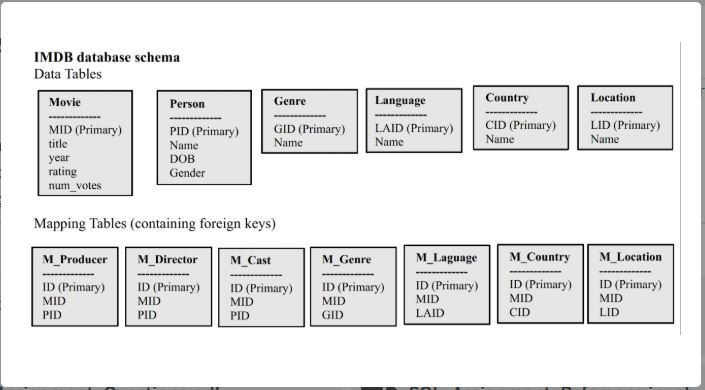

In [2]:
from IPython.display import Image 
Image(filename='schema.jpg') 

In [3]:
from IPython.display import display

In [35]:
reference - https://github.com/santhoshse7en/Applied_Machine_Learning_Online_Course_Solutions
cursor = conn.cursor()
cursor.execute('UPDATE Movie SET year = REPLACE(year, "I", "");')
cursor.execute('UPDATE Movie SET year = REPLACE(year, "V", "");')
cursor.execute('UPDATE Movie SET year = REPLACE(year, "X ", "");')
cursor.execute('UPDATE Movie SET title = LTRIM(title);')
cursor.execute('UPDATE Movie SET year = RTRIM(LTRIM(year));')
cursor.execute('UPDATE Movie SET rating = RTRIM(LTRIM(rating));')
cursor.execute('UPDATE Movie SET num_votes = RTRIM(LTRIM(num_votes));')

cursor.execute('UPDATE M_Producer SET pid = RTRIM(LTRIM(pid));')
cursor.execute('UPDATE M_Producer SET mid = RTRIM(LTRIM(mid));')

cursor.execute('UPDATE M_Director SET pid = RTRIM(LTRIM(pid));')
cursor.execute('UPDATE M_Director SET mid = RTRIM(LTRIM(mid));')

cursor.execute('UPDATE M_Cast SET pid = RTRIM(LTRIM(pid));')
cursor.execute('UPDATE M_Cast SET mid = RTRIM(LTRIM(mid));')

cursor.execute('UPDATE M_Genre SET gid = RTRIM(LTRIM(gid));')
cursor.execute('UPDATE M_Genre SET mid = RTRIM(LTRIM(mid));')

cursor.execute('UPDATE Genre SET gid = RTRIM(LTRIM(gid));')
cursor.execute('UPDATE Genre SET name = RTRIM(LTRIM(name));')

cursor.execute('UPDATE Person SET name = RTRIM(LTRIM(name));')
cursor.execute('UPDATE Person SET pid = RTRIM(LTRIM(pid));')
cursor.execute('UPDATE Person SET gender = RTRIM(LTRIM(gender));')


conn.commit()

In [4]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table' ;", conn)
tables

,name
0,Movie
1,Genre
2,Language
3,Country
4,Location
5,M_Location
6,M_Country
7,M_Language
8,M_Genre
9,Person


### 1. List all the directors who directed a 'Comedy' movie in a leap year. (You need to check that the genre is 'Comedy’ and year is a leap year) Your query should return director name, the movie name, and the year. 

In [37]:
%%time

query = """ 
        SELECT p.Name AS Director_Name, 
               m.title AS Movie_Name, 
               m.year AS Release_Year
        FROM Movie m
                
        JOIN M_Director m_d ON m_d.MID = m.MID
        JOIN Person p ON p.PID = m_d.PID
        JOIN M_Genre m_g ON m_g.MID = m.MID
        JOIN Genre g ON g.GID = m_g.GID
                
        WHERE 
        g.Name LIKE '%Comedy%' 
        AND
        m.year%4=0 
        AND 
        m.year%100!=0 
        OR
        m.year%4=0 
        AND
        m.year%100=0 
        AND 
        m.year%400=0
        
        """
ans = pd.read_sql_query(query, conn)    
#print(ans.shape)
#d.DataFrame(ans)
display(ans)

,Director_Name,Movie_Name,Release_Year
0,Milap Zaveri,Mastizaade,2016
1,Danny Leiner,Harold & Kumar Go to White Castle,2004
2,Anurag Kashyap,Gangs of Wasseypur,2012
3,Frank Coraci,Around the World in 80 Days,2004
4,Griffin Dunne,The Accidental Husband,2008
...,...,...,...
275,Siddharth Anand Kumar,Let's Enjoy,2004
276,Amma Rajasekhar,Sathyam,2008
277,Oliver Paulus,Tandoori Love,2008
278,Raja Chanda,Le Halua Le,2012


Wall time: 81.8 ms


### 2. List the names of all the actors who played in the movie 'Anand' (1971) 

In [19]:
%%time
query = """
        SELECT Name Actor from Person p \
        JOIN M_Cast c ON TRIM(p.PID) = TRIM(c.PID) WHERE MID IN \
        (SELECT MID from Movie WHERE title = 'Anand')
        
        """

ans = pd.read_sql_query(query, conn)    
display(ans)

,Actor
0,Rajesh Khanna
1,Amitabh Bachchan
2,Sumita Sanyal
3,Ramesh Deo
4,Seema Deo
5,Asit Kumar Sen
6,Dev Kishan
7,Atam Prakash
8,Lalita Kumari
9,Savita


Wall time: 101 ms


### 3. List all the actors who acted in a film before 1970 and in a film after 1990. (That is: < 1970 and > 1990.) 

In [22]:
%%time
query = """
        select name as Actor from person where trim (pid) in
        (select trim(pid) from m_cast where mid in
        (select mid from movie m where m.year> 1990)and pid in 
        (select pid from m_cast where mid in 
        (select mid from movie n where n.year < 1970))) 
                        
        """

ans = pd.read_sql_query(query, conn)    
display(ans)

,Actor
0,Rishi Kapoor
1,Amitabh Bachchan
2,Asrani
3,Zohra Sehgal
4,Parikshat Sahni
...,...
328,Poonam
329,Jamila Massey
330,K.R. Vijaya
331,Sethi


Wall time: 92.8 ms


### 4. List all directors who directed 10 movies or more, in descending order of the number of movies they directed. Return the directors' names and the number of movies each of them directed. 

In [24]:
%%time
query = """
        select a.name, count(b.mid) num_movies from person a 
        left join m_director b on a.pid=b.pid group by a.pid having 
        num_movies>10 order by num_movies desc
        
        """
                         
ans = pd.read_sql_query(query, conn)    
display(ans)

,Name,num_movies
0,David Dhawan,39
1,Mahesh Bhatt,35
2,Priyadarshan,30
3,Ram Gopal Varma,30
4,Vikram Bhatt,29
5,Hrishikesh Mukherjee,27
6,Yash Chopra,21
7,Basu Chatterjee,19
8,Shakti Samanta,19
9,Subhash Ghai,18


Wall time: 58.9 ms


### 5. This question has two parts: 
 
### a. For each year, count the number of movies in that year that had only female actors. 
 
### b. Now include a small change: report for each year the percentage of movies in that year with only female actors, and the total number of movies made that year. For example, one answer will be: 1990 31.81 13522 meaning that in 1990 there were 13,522 movies, and 31.81% had only female actors. You do not need to round your answer.  
 

### Part 1 : 

In [38]:
%%time
query =     """
            SELECT count(m.year) mov_cnt, m.year as mov_yr
            FROM Movie m where m.MID not in
            (SELECT mc.MID FROM Person p JOIN M_Cast mc ON trim(p.PID)=trim(mc.PID) WHERE p.Gender='Male')
            GROUP BY mov_yr
            ORDER BY mov_cnt DESC
            
            """

ans = pd.read_sql_query(query, conn)    
display(ans)

,mov_cnt,mov_yr
0,2,2018
1,1,1939
2,1,1999
3,1,2000
4,1,2009
5,1,2012


Wall time: 5min 3s


### Part 2 :

In [39]:
%%time
query = """
        SELECT y.allMov as 'movie_count', x.year as movie_year, ((x.Movies_Cnt*100.0)/y.allMov) as Percent FROM
        (SELECT count(*) Movies_Cnt , m.year
        FROM Movie m where m.MID not in
        (SELECT mc.MID FROM Person p JOIN M_Cast mc ON trim(p.PID) = trim(mc.PID) WHERE p.Gender='Male')
        GROUP BY m.year) x INNER JOIN
        (SELECT count(*) allMov, m.year
        FROM Movie m
        GROUP BY m.year) y on x.year=y.year
        """

ans = pd.read_sql_query(query, conn)    
display(ans)

,movie_count,movie_year,Percent
0,2,1939,50.000000
1,66,1999,1.515152
2,64,2000,1.562500
3,110,2009,0.909091
4,111,2012,0.900901
5,104,2018,1.923077


Wall time: 4min 46s


### 6. Find the film(s) with the largest cast. Return the movie title and the size of the cast. By "cast size" we mean the number of distinct actors that played in that movie: if an actor played multiple roles, or if it simply occurs multiple times in casts, we still count her/him only once. 

In [33]:
%%time
query = """
        SELECT m.title Movie_Name,count(distinct(c.PID)) Cast_Size 
        FROM Movie m JOIN M_Cast c ON c.MID = m.MID 
        GROUP BY m.MID ORDER BY Cast_Size desc limit 30 
        
        """

ans = pd.read_sql_query(query, conn)    
display(ans)

,Movie_Name,Cast_Size
0,Ocean's Eight,238
1,Apaharan,233
2,Gold,215
3,My Name Is Khan,213
4,Captain America: Civil War,191
5,Geostorm,170
6,Striker,165
7,2012,154
8,Pixels,144
9,Yamla Pagla Deewana 2,140


Wall time: 175 ms


### 7. A decade is a sequence of 10 consecutive years. For example, say in your database you have movie information starting from 1965. Then the first decade is 1965, 1966, ..., 1974; the second one is 1967, 1968, ..., 1976 and so on. Find the decade D with the largest number of films and the total number of films in D.   

In [37]:
%%time
query = """
        SELECT d.year Start, d.year+9 End, count(*) no_of_films FROM
        (SELECT DISTINCT year from Movie) d JOIN Movie m ON m.year >= Start and m.year<= End 
        GROUP BY End ORDER BY no_of_films desc LIMIT 30)
        
        """

ans = pd.read_sql_query(query, conn)    
display(ans)

,Start,End,no_of_films
0,2008,2017,1128
1,2009,2018,1118
2,2005,2014,1115
3,2007,2016,1114
4,2004,2013,1100
5,2006,2015,1096
6,2003,2012,1074
7,2002,2011,1050
8,2010,2019,1018
9,2001,2010,1012


Wall time: 71.8 ms


### 8. Find all the actors that made more movies with Yash Chopra than any other director. 

In [46]:
%%time
query = """
        select name from
        (select pa.name,count(d.mid) as yash_total from
        person pd join m_director d on
        d.pid=pd.pid inner join
        m_cast on d.mid=m_cast.mid
        join person pa on
        pa.pid=m_cast.pid
        where pd.name='Yash Chopra'
        group by pd.name,pa.name
        having not exists(
        select count(d_1.mid) as other_directors from
        person pd_1 join
        m_director d_1 on
        d_1.pid=pd_1.pid inner join
        m_cast on d_1.mid=m_cast.mid
        join person pa_1 on
        pa_1.pid=m_cast.pid
        where pd_1.name!='Yash Chopra'
        group by pd_1.name,pa_1.name
        having pa.pid=pa_1.pid and yash_total<other_directors
        )
        )
        
        """
ans = pd.read_sql_query(query, conn)    
display(ans)

,name
0,Abbie Murphy
1,Achala Sachdev
2,Akhtar Mirza
3,Akhtar-Ul-Iman
4,Aloka Mukherjee
...,...
237,Vinod Negi
238,Waheeda Rehman
239,Yash Chopra
240,Yashodra Katju


Wall time: 1min 18s


### 9. The Shahrukh number of an actor is the length of the shortest path between the actor and Shahrukh Khan in the "co-acting" graph. That is, Shahrukh Khan has Shahrukh number 0; all actors who acted in the same film as Shahrukh have Shahrukh number 1; all actors who acted in the same film as some actor with Shahrukh number 1 have Shahrukh number 2, etc. Return all actors whose Shahrukh number is 2. 

In [61]:
%%time 

query = """
        SELECT DISTINCT TRIM(name) Name 
        FROM Person p INNER JOIN M_Cast c on p.PID = TRIM(c.PID) 
        INNER JOIN Movie m ON m.MID = c.MID AND TRIM(p.Name)!='Shah Rukh Khan' 
        and m.title in (SELECT DISTINCT title FROM Person p3 
        INNER JOIN M_Cast c3 on p3.PID = TRIM(c3.PID) AND TRIM(p3.Name) = p3.Name 
        INNER JOIN Movie m3 ON m3.MID = c3.MID AND p3.Name IN 
        (SELECT DISTINCT Name FROM Person p2 INNER JOIN M_Cast c2 ON p2.PID = TRIM(c2.PID) 
        INNER JOIN Movie m2 ON m2.MID = c2.MID AND TRIM(p2.Name)!='Shah Rukh Khan' AND m2.title IN 
        (SELECT DISTINCT title FROM Person p3 INNER JOIN M_Cast c3 ON p3.PID = TRIM(c3.PID) AND 
        TRIM(p3.Name) = 'Shah Rukh Khan' INNER JOIN Movie m3 ON m3.MID = c3.MID))) ORDER BY Name
        """

ans = pd.read_sql_query(query, conn)    
display(ans)

,Name
0,'Ganja' Karuppu
1,'Musafir' Radio Performing
2,'Nandha' Saravanan
3,'Om' Rakesh Chaturvedi
4,A'Ali de Sousa
...,...
27022,Zurab Kapianidze
27023,Zuri Echea
27024,Zuzanna Zajac
27025,Àaron Brewster


Wall time: 830 ms
